<a href="https://colab.research.google.com/github/Vezhani/machine-learning/blob/main/case_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [3]:
df = pd.DataFrame({'x_1':[0,0,1,0,2,1,0,2,2,1],
 'x_2':[0,1,2,0,2,1,2,0,1,0],
 'y':[0,1,1,1,0,0,1,0,0,0]})
df

,x_1,x_2,y
0,0,0,0
1,0,1,1
2,1,2,1
3,0,0,1
4,2,2,0
5,1,1,0
6,0,2,1
7,2,0,0
8,2,1,0
9,1,0,0


In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.DataFrame({'x_1':[0,0,1,0,2,1,0,2,2,1],
 'x_2':[0,1,2,0,2,1,2,0,1,0],
 'y':[0,1,1,1,0,0,1,0,0,0]})
df

,x_1,x_2,y
0,0,0,0
1,0,1,1
2,1,2,1
3,0,0,1
4,2,2,0
5,1,1,0
6,0,2,1
7,2,0,0
8,2,1,0
9,1,0,0


In [9]:
def prob_prior(df, Y):
    label_kelas = sorted(list(df[Y].unique()))
    prior = []
    for i in label_kelas:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

def likelihood_categorical(df, nama_var, nilai_var, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    p_x_dgsyrt_y = len(df[df[nama_var]==nilai_var]) / len(df)
    return p_x_dgsyrt_y

def naive_bayes_categorical(df, X, Y):
    # mengambil nama kolom
    nama_kolom = list(df.columns)[:-1]
    # menghitung prob prior
    prior = prob_prior(df, Y)
    Y_pred = []
    # lopping pada setiap baris data
    for x in X:
        # menghitung likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(nama_kolom)):
                likelihood[j] *= likelihood_categorical(df,
nama_kolom[i], x[i], Y, labels[j])
      # menghitung posterior probability
      post_prob = [1]*len(labels)
      for j in range(len(labels)):
           post_prob[j] = likelihood[j] * prior[j]


      Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=.2, random_state=41)

X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values
Y_pred = naive_bayes_categorical(train, X=X, Y="y")

IndentationError: ignored

In [12]:
data = pd.read_csv("/content/diabetes.csv")
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [13]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.3, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_categorical(train, X=X_test, Y="Outcome")

from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_pred))

NameError: ignored

In [15]:
data = pd.read_csv("/content/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
import pandas as pd
import numpy as np

In [17]:
data = pd.read_csv("https://raw.githubusercontent.com/rofifahzaki/Kelas-Mahir/main/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


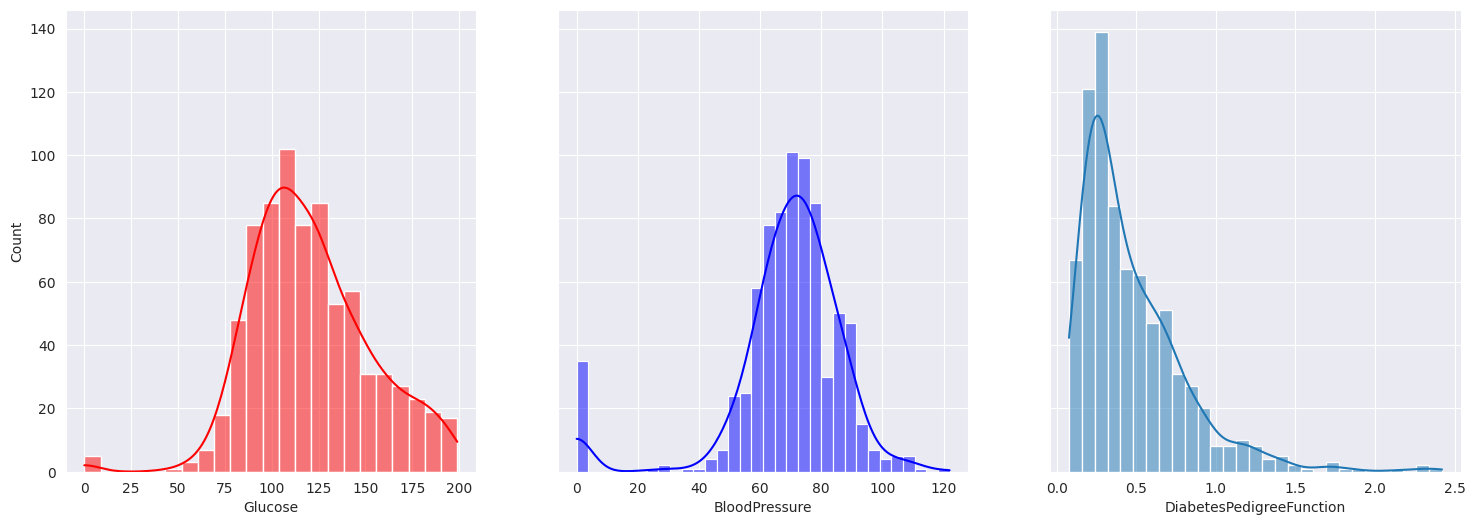

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(data, ax=axes[0], x="Glucose", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="BloodPressure", kde=True,
color='b')
sns.histplot(data, ax=axes[2], x="DiabetesPedigreeFunction",
kde=True)
plt.show()

In [19]:
def prob_prior(df, Y):
    label_kelas = sorted(list(df[Y].unique()))
    prior = []
    for i in label_kelas:
    prior.append(len(df[df[Y]==i])/len(df))
    return prior
def likelihood_gaussian(df, nama_var, nilai_var, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[nama_var].mean(), df[nama_var].std()
    p_x_dgsyrt_y = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-
((nilai_var-mean)**2 / (2 * std**2 )))
    return p_x_dgsyrt_y

def naive_bayes_gaussian(df, X, Y):
    # mengambil nama kolom
    nama_kolom = list(df.columns)[:-1

    # menghitung prob prior
    prior = prob_prior(df, Y)

    Y_pred = []
    # lopping pada setiap baris data
    for x in X:
        # menghitung likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(nama_kolom)):
                likelihood[j] *= likelihood_gaussian(df,
nama_kolom[i], x[i], Y, labels[j])

        # menghitung posterior probability
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)


train, test = train_test_split(data, test_size=.2, random_state=41)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="Outcome")

print(accuracy_score(Y_test, Y_pred))

IndentationError: ignored